In [2]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'rootroot',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
new_train = pd.read_sql_table('train', engine)
new_train.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,60.0,Business travel,Business,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,neutral or dissatisfied
1,Male,disloyal Customer,38.0,Business travel,Business,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31.0,Business travel,Business,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,satisfied
3,Male,Loyal Customer,53.0,Business travel,Business,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,neutral or dissatisfied
4,Male,Loyal Customer,30.0,Personal Travel,Eco,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [3]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'rootroot',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
new_test = pd.read_sql_table('test', engine)
new_test.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from pathlib import Path
from collections import Counter

In [6]:
# Create features for new train
nw_tr = new_train.drop(columns="satisfaction", axis=1)
nw_tr = pd.get_dummies(nw_tr)

# Create target
y = new_train["satisfaction"]

nw_tr

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,60.0,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,0,1,1,0,1,0,1,0,0
1,38.0,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,0,1,0,1,1,0,1,0,0
2,31.0,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,0,1,1,0,1,0,1,0,0
3,53.0,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,0,1,1,0,1,0,1,0,0
4,30.0,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,39.0,3483.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,0.0,0.0,1,0,1,0,1,0,1,0,0
103590,42.0,3636.0,0.0,5.0,0.0,4.0,2.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,0,1,1,0,1,0,1,0,0
103591,64.0,376.0,1.0,5.0,1.0,1.0,2.0,4.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,0.0,0.0,1,0,1,0,0,1,0,1,0
103592,57.0,192.0,5.0,5.0,5.0,1.0,2.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,0.0,0.0,1,0,1,0,0,1,0,1,0


In [7]:
# Create features for new test
nw_ts = new_test.drop(columns="satisfaction", axis=1)
nw_ts = pd.get_dummies(nw_ts)

# Create target
z = new_test["satisfaction"]

nw_ts

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52.0,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1,0,1,0,1,0,0,1,0
1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1,0,1,0,1,0,1,0,0
2,20.0,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0,1,0,1,1,0,0,1,0
3,44.0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,0,1,1,0,1,0,1,0,0
4,49.0,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,0,1,0,1,1,0,1,0,0
25889,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0
25890,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,1,0,1,0,0,1,0,1,0
25891,14.0,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0


In [8]:
y.describe()

count                      103594
unique                          2
top       neutral or dissatisfied
freq                        58697
Name: satisfaction, dtype: object

In [9]:
z.describe()

count                       25893
unique                          2
top       neutral or dissatisfied
freq                        14528
Name: satisfaction, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Encode text labels into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)
z_encoded = le.fit_transform(z)

In [12]:
# Check the balance of target values
#y_encoded.value_counts()
print(y_encoded)
print(z_encoded)

[0 0 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [13]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [14]:
print(type(y_encoded))

<class 'numpy.ndarray'>


In [15]:
pd.Series(y_encoded).value_counts()

0    58697
1    44897
dtype: int64

In [16]:
nw_ts.count()

Age                                  25893
Flight Distance                      25893
Inflight wifi                        25893
Departure/Arrival_time_convenient    25893
Ease_of_Online booking               25893
Gate_location                        25893
Food_and_drink                       25893
Online boarding                      25893
Seat comfort                         25893
Inflight entertainment               25893
On-board service                     25893
Leg room service                     25893
Baggage handling                     25893
Checkin service                      25893
Inflight service                     25893
Cleanliness                          25893
Departure_Delay_in_Minutes           25893
Arrival_Delay_in_Minutes             25893
Gender_Female                        25893
Gender_Male                          25893
Customer_Loyal Customer              25893
Customer_disloyal Customer           25893
Type_of_Travel_Business travel       25893
Type_of_Tra

In [17]:
nw_ts.dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi                        float64
Departure/Arrival_time_convenient    float64
Ease_of_Online booking               float64
Gate_location                        float64
Food_and_drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer_Loyal Customer                uint8
Customer_disloyal Customer             uint8
Type_of_Tr

In [18]:
nw_tr.count()

Age                                  103594
Flight Distance                      103594
Inflight wifi                        103594
Departure/Arrival_time_convenient    103594
Ease_of_Online booking               103594
Gate_location                        103594
Food_and_drink                       103594
Online boarding                      103594
Seat comfort                         103594
Inflight entertainment               103594
On-board service                     103594
Leg room service                     103594
Baggage handling                     103594
Checkin service                      103594
Inflight service                     103594
Cleanliness                          103594
Departure_Delay_in_Minutes           103594
Arrival_Delay_in_Minutes             103594
Gender_Female                        103594
Gender_Male                          103594
Customer_Loyal Customer              103594
Customer_disloyal Customer           103594
Type_of_Travel_Business travel  

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
new_train['Gender'] = new_train['Gender'].replace([0,1],['Female','Male'],inplace=True)

In [21]:
# Train the data
classifier.fit(nw_tr, y_encoded)
classifier.fit(nw_ts, z_encoded)
#print(y_encoded)
#new_train.dtypes


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Predict outcomes for train data set
predictions_train = classifier.predict(nw_tr)
pd.DataFrame({"Prediction": predictions_train, "Actual": y_encoded})
#print(len(y_encoded))
#print(len(predictions))


,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
103589,1,1
103590,0,1
103591,0,0
103592,1,1


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_encoded, predictions_train)

0.8148831013379153

In [24]:
# Predict outcomes for test data set
predictions = classifier.predict(nw_ts)
df = pd.DataFrame({"Prediction": predictions, "Actual": z_encoded})
df

,Prediction,Actual
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25888,1,0
25889,1,1
25890,0,0
25891,1,1


In [25]:
df["Actual"].value_counts()

0    14528
1    11365
Name: Actual, dtype: int64

In [27]:
# Accuracy score for test dataset
from sklearn.metrics import accuracy_score
accuracy_score(z_encoded, predictions)

0.8198740972463601

In [29]:
# Display the confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(z_encoded, predictions)


array([[11957,  2571],
       [ 2093,  9272]])

In [40]:
from sklearn.metrics import classification_report


In [41]:
#Classification report for train data
print (classification_report(y_encoded, predictions_train))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     58697
           1       0.77      0.81      0.79     44897

    accuracy                           0.81    103594
   macro avg       0.81      0.81      0.81    103594
weighted avg       0.82      0.81      0.82    103594



In [42]:
from sklearn.metrics import plot_confusion_matrix

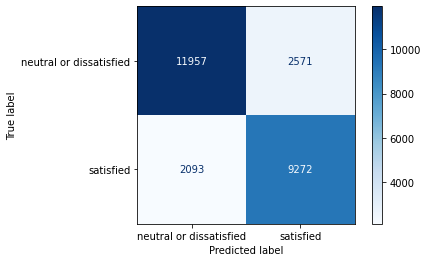

In [48]:
plot_confusion_matrix(classifier,nw_ts,z_encoded,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])